In [45]:
import numpy as np
import pandas as pd
import warnings
import shutil
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf


warnings.filterwarnings("ignore")

In [46]:
##

In [47]:
triplets_df.head(5)

,anchor,id1,pos,id2,neg,id3
0,056279.jpg,1,108998.jpg,1,030848.jpg,496
1,024091.jpg,1,000023.jpg,1,093653.jpg,9313
2,122082.jpg,3,045833.jpg,3,188283.jpg,7200
3,110393.jpg,3,021233.jpg,3,178433.jpg,4643
4,101388.jpg,4,056784.jpg,4,105432.jpg,2988


## Utils 

In [48]:
def display_triplet(triplets_df, triplet_id):
    # Load the images


    triplet = triplets_df.iloc[triplet_id]

    
    anchor_img = mpimg.imread(PATH_TO_IMGS + triplet["anchor"])
    pos_img = mpimg.imread(PATH_TO_IMGS + triplet["pos"])
    neg_img = mpimg.imread(PATH_TO_IMGS + triplet["neg"])
    
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    # Display each image
    axs[0].imshow(anchor_img)
    axs[0].set_title('Anchor Image')
    axs[0].axis('off') 
    
    axs[1].imshow(pos_img)
    axs[1].set_title('Positive Image')
    axs[1].axis('off')  
    
    axs[2].imshow(neg_img)
    axs[2].set_title('Negative Image')
    axs[2].axis('off')  
    
    plt.show()

In [49]:
def parse_csv_line(line):
    columns = ['anchor', 'id1', 'pos', 'id2', 'neg', 'id3']
    
    # Decode the CSV line
    record_defaults = [''] * 6  # All fields are strings
    parsed_line = tf.io.decode_csv(line, record_defaults)
    parsed_line = dict(zip(columns, parsed_line))
    return parsed_line


def load_and_preprocess_image(path):
    
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [100, 100])
    image = image / 255.0
    return image



def create_triplet_dataset(csv_file_path, batch_size=32):
    dataset = tf.data.TextLineDataset(csv_file_path)
    # Skip the header line
    dataset = dataset.skip(1)
    
    # Parse each line
    dataset = dataset.map(lambda line: parse_csv_line(line))
    # Load and preprocess the images
    def load_images(parsed_line):

        base_path = tf.constant(PATH_TO_IMGS)
        
        anchor_path = tf.strings.join([base_path, parsed_line['anchor']], separator='')
        pos_path = tf.strings.join([base_path, parsed_line['pos']], separator='')
        neg_path = tf.strings.join([base_path, parsed_line['neg']], separator='')

        
        anchor = load_and_preprocess_image(anchor_path)
        pos = load_and_preprocess_image(pos_path)
        neg = load_and_preprocess_image(neg_path)
        return anchor, pos, neg

    
    dataset = dataset.map(load_images)
    dataset = dataset.batch(batch_size)
    return dataset


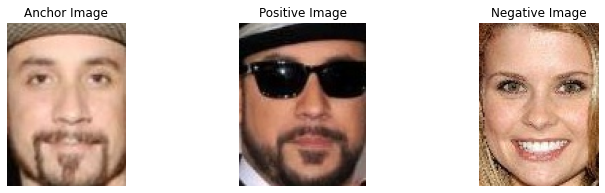

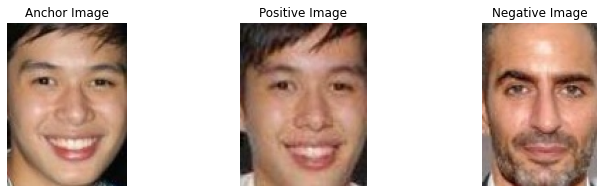

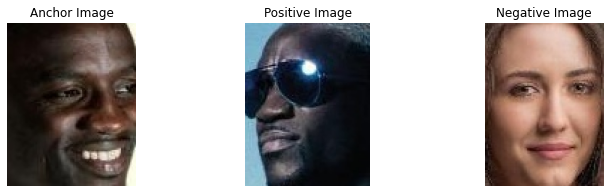

In [50]:
display_triplet(triplets_df, 3)
display_triplet(triplets_df, 7)
display_triplet(triplets_df, 9)

In [51]:
os.path.join(PATH_TO_IMGS, "hello.jpg")

'../images/hello.jpg'

In [52]:
dataset = create_triplet_dataset("../triplets.csv")

In [53]:
 anchor_batch, pos_batch, neg_batch = next(iter(dataset.take(1)))

In [57]:
from building_model import SiameseModel, build_siamesenetwork, build_embedding_generator



emb_gen = build_embedding_generator()

siam_net = build_siamesenetwork(emb_gen)

siamese_model = SiameseModel(siam_net, margin=0.6)

TypeError: descriptor '__init__' of 'super' object needs an argument